<a href="https://colab.research.google.com/github/ejay34/07_protection_of_personal_data/blob/main/07_protection_personal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Защита персональных данных клиентов

Заказчику - страховой компании «Хоть потоп» необходимо защитить данные клиентов.

*Цель работы:* Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, а качество моделей машинного обучения не ухудшилось.

*Этапы работы:*
1. Работа с данными:
  - Загрузка данных
  - Изучение данных
  - Подготовка даных
2. Создание алгоритма преобразования
3. Проверка алгоритма
4. Вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li><li><span><a href="#Сохранение-датасета-в-переменную" data-toc-modified-id="Сохранение-датасета-в-переменную-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Сохранение датасета в переменную</a></span></li><li><span><a href="#Изучение-данных-датасета" data-toc-modified-id="Изучение-данных-датасета-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение данных датасета</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Распределение-признаков" data-toc-modified-id="Распределение-признаков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Распределение признаков</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-обучающие-и-целевой-признаки" data-toc-modified-id="Разделение-данных-на-обучающие-и-целевой-признаки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных на обучающие и целевой признаки</a></span></li><li><span><a href="#Генерирование-случайной-матрицы" data-toc-modified-id="Генерирование-случайной-матрицы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Генерирование случайной матрицы</a></span></li><li><span><a href="#Создание-класса-Линейной-регрессии" data-toc-modified-id="Создание-класса-Линейной-регрессии-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Создание класса Линейной регрессии</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Модель-с-исходными-данными" data-toc-modified-id="Модель-с-исходными-данными-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель с исходными данными</a></span></li><li><span><a href="#Модифицированная-модель" data-toc-modified-id="Модифицированная-модель-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модифицированная модель</a></span></li><li><span><a href="#Разность-показаний-между-моделями" data-toc-modified-id="Разность-показаний-между-моделями-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Разность показаний между моделями</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

### Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Сохранение датасета в переменную

In [ ]:
data = pd.read_csv('/datasets/insurance.csv')

### Изучение данных датасета

In [ ]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
print(f'Датасет содержит {data.shape[0]} объектов и {data.shape[1]} признаков')

Датасет содержит 5000 объектов и 5 признаков


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
print('Количество полных дубликатов:', data.duplicated().sum())

Количество полных дубликатов: 153


In [ ]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Удаление дубликатов

In [ ]:
data.drop_duplicates(inplace=True)

### Замена типа данных

In [ ]:
data['Возраст'] = data['Возраст'].astype('int64')
data['Зарплата'] = data['Зарплата'].astype('int64')

### Распределение признаков

In [ ]:
categorical_features = ['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты']

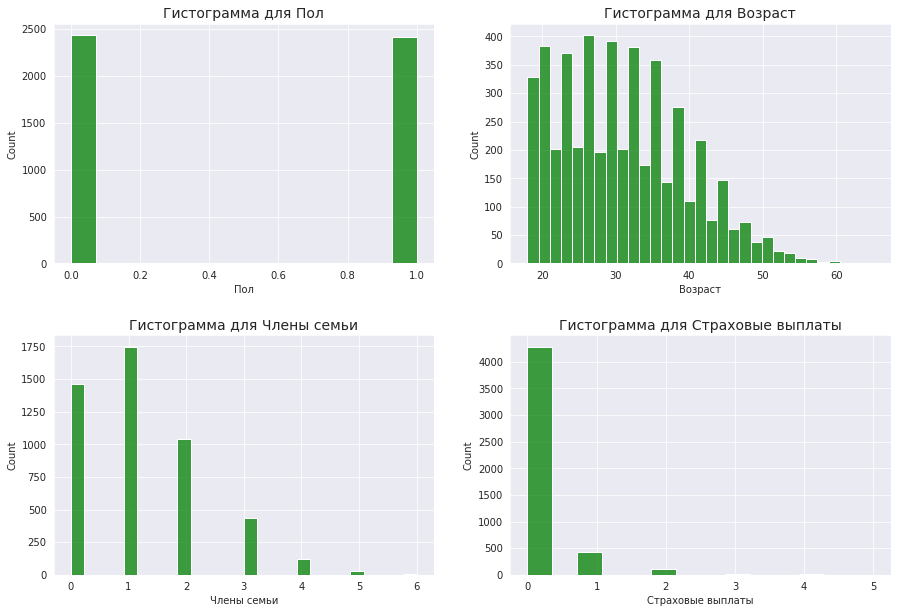

In [ ]:
plt.figure(figsize=[15, 20])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
sns.set_style('darkgrid')

position = 0

for feature in categorical_features:
    position += 1
    plt.subplot(4, 2, position)
    plt.title(f'Гистограмма для {feature}', fontsize=14)
    sns.histplot(data[feature], color='g', kde=False)
plt.show();

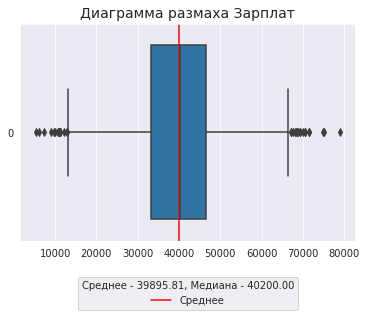

In [ ]:
plt.title(f'Диаграмма размаха Зарплат', fontsize=14)
sns.boxplot(data=data['Зарплата'], orient='h')
plt.axvline(data['Зарплата'].mean(),
            color='r',
            label='Среднее')
plt.legend(title=f'Среднее - {data["Зарплата"].mean():.2f}, Медиана - {data["Зарплата"].median():.2f}',
           loc='center',
           bbox_to_anchor=(0.5, -0.24))
plt.show();

**Промежуточный вывод:** В данной части нашей работы мы прочитали и записали данные в переменную, провели предварительный анализ данных. Заменили тип данных в признаках `Возраст` и `Зарплата`. В данных присутствуют полные дубликаты, общая доля которых от общего датасета составляет около 3%. Исследуя распределения данных по признакам мы видим, что в данных присутствуют выбросы. Однако, на нашу работу они не влияют, поэтому было решено их оставить в исходном виде.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $\vec{y}$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $\vec{w}$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = X\vec{w}
$$

Задача обучения:

$$
\vec{w} = \arg\min_\vec{w} MSE(X\vec{w}, \vec{y})
$$

Формула обучения:

$$
\vec{w} = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении признаков на обратимую матрицу качество линейной регрессии не меняется



**Обоснование:** Используя введенные обозначения выведем формулу предсказаний для модифицированной матрицы признаков

$$
a' = ZP\vec{w},
$$

где $Z = XP$ - модифицированная матрица, полученная домножением вектора $P$ на матрицу признаков $X$

Применим полученные выражения в формуле обучения:

$$
\vec{w'} = (Z^T Z)^{-1} Z^T \vec{y}
$$

Выразим $Z$ через произведение $XP$


$$
\vec{w'} = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
\vec{w'} = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
......
$$
$$
\vec{w'} = P^{-1} (X^T X)^{-1} (P^T)^{-1} (XP)^T y
$$
$$
\vec{w'} = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
\vec{w'} = P^{-1} (X^T X)^{-1} E X^T y
$$
$$
\vec{w'} = P^{-1}w
$$


Зная, что $\vec{w} = (X^T X)^{-1} X^T \vec{y}$, получим

$$
\vec{w'} = P^{-1}\vec{w}
$$

Теперь, выведем формулу предсказания для модифицированной матрицы

$$
a' = Z\vec{w'} = (XP) P^{-1} \vec{w} = X\vec{w} = a
$$

Таким образом, мы видим, что предсказание для исходной и модифицированной матриц, равны.

***Следовательно, при умножении признаков на обратимую матрицу качество линейной регрессии не меняется. Что и требовалось доказать.***

## Алгоритм преобразования

**Алгоритм**

Для получения результатов опытным путем произведем следубщие действия:
- Разделим исходные данные на обучающие признаки и целевой.
- Создадим случайно сгенерированную матрицу и включим проверку на существование обратимой матрицы
- Создадим класс Линейной регрессии с методами fit и predict
- Создадим функцию обучения, предсказания и вычисления метрики качества модели

### Разделение данных на обучающие и целевой признаки

In [ ]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

### Генерирование случайной матрицы

In [ ]:
# Создадим случайно сгенерированную матрицу
P = np.random.randn(4, 4)

# Проверим существование обратимой матрицы у случайно сгенерированной
try:
    inv_P = np.linalg.inv(P)
    print('Для случайно сгенерированной матрицы существует обратимая матрица')
except:
    print('Для случайно сгенерированной матрицы не существует обратимой матрицы')

Для случайно сгенерированной матрицы существует обратимая матрица


### Создание класса Линейной регрессии

In [ ]:
class LinearRegression:

    '''Класс Линейной регрессии содержит два метода:
    обучение (.fit) и предсказание (.predict)'''

    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)),
                            train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

**Обоснование** Создание данного алгоритма предполагает обучение двух моделей на исходных и модифицированных данных, предсказания целевого признака и вычисление метрики качества R2, после чего значения метрик сравниваются и выводится заключение возможности защиты персональных данных клиентов шифрованием с применением обратимой матрицы.

## Проверка алгоритма

In [ ]:
def model_train_predict(features, target):

    '''Функция объявляет модель линейной регрессии,
    обучает модель, предсказывает целевой признак
    и вычисляет значение метрики R2'''

    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)
    return r2_score(target, predictions)

### Модель с исходными данными

In [ ]:
r2_features = model_train_predict(features, target)
print('Значение R2 для матрицы исходных признаков = ', r2_features)

Значение R2 для матрицы исходных признаков =  0.4302010046633359


### Модифицированная модель

In [ ]:
new_features = features @ P
r2_new_features = model_train_predict(new_features, target)
print('Значение R2 для матрицы модифицированных признаков = ', r2_new_features)

Значение R2 для матрицы модифицированных признаков =  0.43019818652493713


### Разность показаний между моделями

In [ ]:
print('Разница метрик исходных данных и модифицированных:', abs(r2_new_features - r2_features))

Разница метрик исходных данных и модифицированных: 2.8181383987524455e-06


### Вывод:

Разница метрик, полученных при предсказании результатов на исходных данных и полученных на данных, умноженных на обратимую матрицу различаются на пренебрежимо малую величину.

Таким образом, мы доказали экспериментальным путем, что на результат предсказания линейной регрессии не влияет умножение матрицы признаков на обратимую матрицу.